
# Liver Disease Prediction

#### Content
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

- Age of the patient
- Gender of the patient
- Total Bilirubin
- Direct Bilirubin
- Alkaline Phosphotase
- Alamine Aminotransferase
- Aspartate Aminotransferase
- Total Protiens
- Albumin
- Albumin and Globulin Ratio
- Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

In [3]:
# Reading Dataset:
dataset = pd.read_csv("Dataset/Liver_data.csv")
# Top 5 records:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# Last 5 records:
dataset.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [5]:
# Shape of dataset:
dataset.shape

(583, 11)

In [6]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

- 'Albumin_and_Globulin_Ratio' feature contain 4 NaN values.

In [7]:
# Mean & Median of "Albumin_and_Globulin_Ratio" feature:
print(dataset['Albumin_and_Globulin_Ratio'].median())
print(dataset['Albumin_and_Globulin_Ratio'].mean())

0.93
0.9470639032815201


In [8]:
# Filling NaN Values of "Albumin_and_Globulin_Ratio" feature with Median :
dataset['Albumin_and_Globulin_Ratio'] = dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())

In [9]:
# Datatypes:
dataset.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [10]:
# Description:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Liver Disease Patients      : 416
Non Liver Disease Patients  : 167


C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


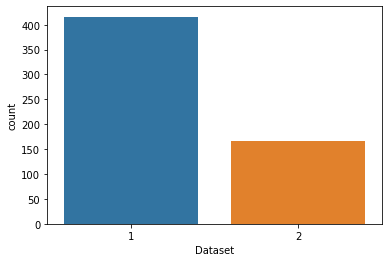

In [11]:
# Target feature:
print("Liver Disease Patients      :", dataset['Dataset'].value_counts()[1])
print("Non Liver Disease Patients  :", dataset['Dataset'].value_counts()[2])

# Visualization:
sns.countplot(dataset['Dataset'])
plt.show()

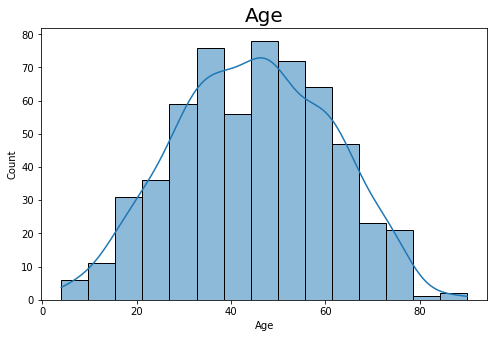

In [12]:
# Histrogram of Age:
plt.figure(figsize=(8,5))
sns.histplot(dataset['Age'], kde=True)
plt.title('Age', fontsize=20)
plt.show()

In [13]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Total Male   : 441
Total Female : 142


C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


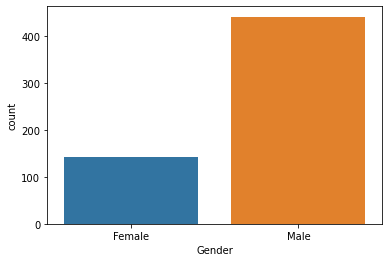

In [14]:
# Gender feature:
print("Total Male   :", dataset['Gender'].value_counts()[0])
print("Total Female :", dataset['Gender'].value_counts()[1])

# Visualization:
sns.countplot(dataset['Gender'])
plt.show()

In [15]:
# Printing How many Unique values present in each feature: 
for feature in dataset.columns:
    print(feature,":", len(dataset[feature].unique()))

Age : 72
Gender : 2
Total_Bilirubin : 113
Direct_Bilirubin : 80
Alkaline_Phosphotase : 263
Alamine_Aminotransferase : 152
Aspartate_Aminotransferase : 177
Total_Protiens : 58
Albumin : 40
Albumin_and_Globulin_Ratio : 69
Dataset : 2


In [16]:
# Label Encoding
dataset['Gender'] = np.where(dataset['Gender']=='Male', 1,0)

In [17]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


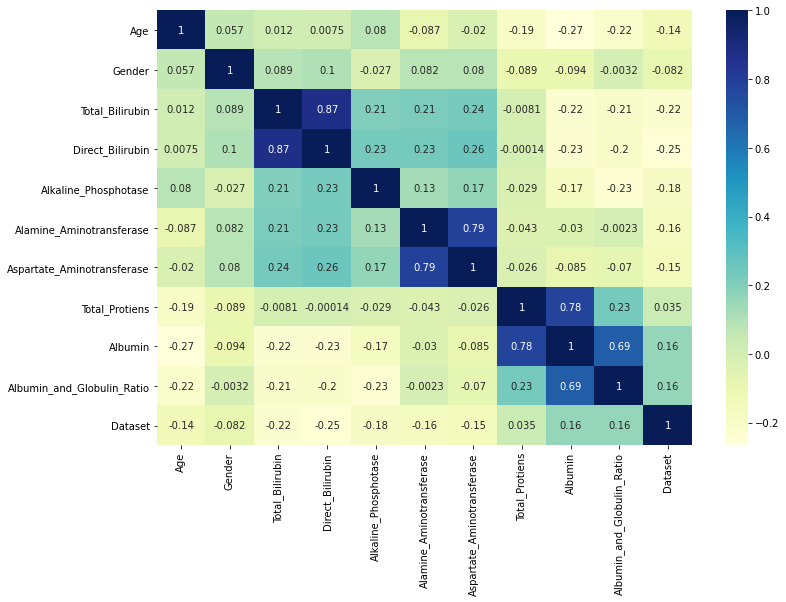

In [18]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### There is Multi-Collinearity found on our dataset.

In [19]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

1. Multicollinearity betwwen **'Total_Bilirubin'** and **'Direct_Bilirubin'** is **0.87%**
2. Multicollinearity betwwen **'Alamine_Aminotransferase'** and **'Aspartate_Aminotransferase' **is **0.79%**
3. Multicollinearity betwwen **'Total_Protiens'** and **'Albumin'** is **0.78%**
4. Multicollinearity betwwen **'Albumin'** and **'Albumin_and_Globulin_Ratio'** is **0.69%**

Usually we drop that feature which has above 0.85% multicollinearity between two independent feature.
Here we have only 'Total_Bilirubin' and 'Direct_Bilirubin' feature which has 0.87% mutlicollinearity. So we drop one of the feature from them
and other independent feature has less multicollinearity, less than 0.80% So we keep that feature. 

In [20]:
# Droping 'Direct_Bilirubin' feature:
dataset = dataset.drop('Direct_Bilirubin', axis=1)

In [21]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Albumin', ylabel='Density'>

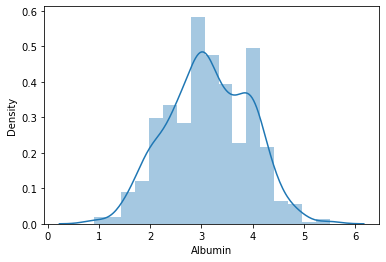

In [22]:
sns.distplot(dataset['Albumin'])

In [23]:
# Calculate the boundaries of Total_Protiens feature which differentiates the outliers:
uppper_boundary=dataset['Total_Protiens'].mean() + 3* dataset['Total_Protiens'].std()
lower_boundary=dataset['Total_Protiens'].mean() - 3* dataset['Total_Protiens'].std()

print(dataset['Total_Protiens'].mean())
print(lower_boundary)
print(uppper_boundary)

6.483190394511151
3.2268359424407524
9.73954484658155


In [24]:
##### Calculate the boundaries of Albumin feature which differentiates the outliers:
uppper_boundary=dataset['Albumin'].mean() + 3* dataset['Albumin'].std()
lower_boundary=dataset['Albumin'].mean() - 3* dataset['Albumin'].std()

print(dataset['Albumin'].mean())
print(lower_boundary)
print(uppper_boundary)

3.14185248713551
0.7552960692434287
5.528408905027591


In [25]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = dataset.Total_Bilirubin.quantile(0.75)-dataset.Total_Bilirubin.quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Total_Bilirubin'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Total_Bilirubin'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Total_Bilirubin'] >= upper_bridge, 'Total_Bilirubin'] = upper_bridge

-4.6000000000000005
8.0


In [26]:
# Lets compute the Interquantile range of Alkaline_Phosphotase feature to calculate the boundaries:
IQR = dataset.Alkaline_Phosphotase.quantile(0.75) - dataset.Alkaline_Phosphotase.quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Alkaline_Phosphotase'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Alkaline_Phosphotase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Alkaline_Phosphotase'] >= upper_bridge, 'Alkaline_Phosphotase'] = upper_bridge

-192.0
665.5


In [27]:
# Lets compute the Interquantile range of Alamine_Aminotransferase feature to calculate the boundaries:
IQR = dataset.Alamine_Aminotransferase.quantile(0.75) - dataset.Alamine_Aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Alamine_Aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Alamine_Aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Alamine_Aminotransferase'] >= upper_bridge, 'Alamine_Aminotransferase'] = upper_bridge

-89.5
173.0


In [28]:
# Lets compute the Interquantile range of Aspartate_Aminotransferase feature to calculate the boundaries:
IQR = dataset.Aspartate_Aminotransferase.quantile(0.75) - dataset.Aspartate_Aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Aspartate_Aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Aspartate_Aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Aspartate_Aminotransferase'] >= upper_bridge, 'Aspartate_Aminotransferase'] = upper_bridge

-161.0
273.0


In [29]:
# Lets compute the Interquantile range of Albumin_and_Globulin_Ratio feature to calculate the boundaries
IQR = dataset.Albumin_and_Globulin_Ratio.quantile(0.75) - dataset.Albumin_and_Globulin_Ratio.quantile(0.25)

# Extreme outliers
lower_bridge = dataset['Albumin_and_Globulin_Ratio'].quantile(0.25) - (IQR*3)
upper_bridge = dataset['Albumin_and_Globulin_Ratio'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
dataset.loc[dataset['Albumin_and_Globulin_Ratio'] >= upper_bridge, 'Albumin_and_Globulin_Ratio'] = upper_bridge

-0.5000000000000004
2.3000000000000007


In [30]:
# Top 5 records:
dataset.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,1,8.0,665.5,64.0,100.0,7.5,3.2,0.74,1
2,62,1,7.3,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,1,1.0,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,1,3.9,195.0,27.0,59.0,7.3,2.4,0.40,1


In [31]:
# Description after deal with outliers by IQR:
dataset.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,2.249400,266.389365,53.399657,73.041166,6.483190,3.141852,0.945403,1.286449
std,16.189833,0.429603,2.382344,145.665460,46.059536,73.549864,1.085451,0.795519,0.310942,0.452490
min,4.000000,0.000000,0.400000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,8.000000,665.500000,173.000000,273.000000,9.600000,5.500000,2.300000,2.000000


In [32]:
# Independent and Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [33]:
# top 5 records of Independent features:
X.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,187.0,16.0,18.0,6.8,3.3,0.90
1,62,1,8.0,665.5,64.0,100.0,7.5,3.2,0.74
2,62,1,7.3,490.0,60.0,68.0,7.0,3.3,0.89
3,58,1,1.0,182.0,14.0,20.0,6.8,3.4,1.00
4,72,1,3.9,195.0,27.0,59.0,7.3,2.4,0.40


In [34]:
# top 5 records of dependent features:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [35]:
# SMOTE Technique:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()
X_smote, y_smote = smote.fit_resample(X,y)

In [36]:
# Counting before and after SMOTE:
from collections import Counter
print('Before SMOTE : ', Counter(y))
print('After SMOTE  : ', Counter(y_smote))

Before SMOTE :  Counter({1: 416, 2: 167})
After SMOTE  :  Counter({1: 392, 2: 392})


In [37]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote, test_size=0.3, random_state=33)

In [38]:
print(X_train.shape)
print(X_test.shape)

(548, 9)
(236, 9)


In [39]:
# Feature Importance :
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=9)
ordered_feature=ordered_rank_features.fit(X,y)

dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns=['Features','Score']
features_rank.nlargest(9, 'Score')

,Features,Score
5,Aspartate_Aminotransferase,3368.743077
3,Alkaline_Phosphotase,2385.790640
4,Alamine_Aminotransferase,1717.348297
2,Total_Bilirubin,127.476411
0,Age,64.315174
7,Albumin,3.053371
8,Albumin_and_Globulin_Ratio,1.704602
1,Gender,0.964518
6,Total_Protiens,0.129627


#### There is no need of Standardization and Normalization of our dataset, as we using Ensemble Technique.

In [40]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8516949152542372
[[ 94  20]
 [ 15 107]]
              precision    recall  f1-score   support

           1       0.86      0.82      0.84       114
           2       0.84      0.88      0.86       122

    accuracy                           0.85       236
   macro avg       0.85      0.85      0.85       236
weighted avg       0.85      0.85      0.85       236



In [43]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7457627118644068
[[88 26]
 [34 88]]
              precision    recall  f1-score   support

           1       0.72      0.77      0.75       114
           2       0.77      0.72      0.75       122

    accuracy                           0.75       236
   macro avg       0.75      0.75      0.75       236
weighted avg       0.75      0.75      0.75       236



In [44]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8220338983050848
[[ 91  23]
 [ 19 103]]
              precision    recall  f1-score   support

           1       0.83      0.80      0.81       114
           2       0.82      0.84      0.83       122

    accuracy                           0.82       236
   macro avg       0.82      0.82      0.82       236
weighted avg       0.82      0.82      0.82       236



####  RandomizedSearchCV

In [45]:
# Importing RandomizedSearchCV:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
# Number of trees in random forest:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] 

# Number of features to consider at every split:
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree:
max_depth = [int(x) for x in np.linspace(100, 100,20)]

# Minimum number of samples required to split a node:
min_samples_split = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20]

In [47]:
# Create the random grid:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20], 'criterion': ['entropy', 'gini']}


In [48]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose = 2,
                               random_state = 0, n_jobs = -1)

# fit the randomized model:
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.71521268 0.75721435 0.7188824  0.70974145 0.7388824
 0.76266889 0.73164304 0.74622185 0.74620517 0.70792327 0.74618849
 0.7133945  0.71155963 0.71704754 0.74435363 0.70793995 0.76261885
 0.74618849 0.7718432         nan 0.7388824  0.77185988 0.71521268
 0.7188824  0.71522936 0.73524604 0.74438699 0.76083403 0.73526272
 0.71704754        nan 0.75713094 0.75169308 0.71157631 0.74071726
 0.72979149 0.77182652 0.77547957 0.75718098 0.73342786 0.70790659
 0.72613845 0.71159299 0.70061718 0.73524604        nan 0.72613845
        nan 0.73889908 0.73889908 0.71886572 0.73160967 0.75169308
 0.7370809  0.75351126 0.77911593 0.74802335 0.70427023 0.73889908
 0.7333945  0.73893244 0.70608841 0.7388824  0.76812344 0.7188824
 0.75165972 0.74073394 0.7498749  0.71886572        nan 0.76085071
 0.72250209 0.73524604 0.74623853 0.75349458 0.7425688

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [100, 100, 100, 100, 100,
                                                      100, 100, 100, 100, 100,
                                                      100, 100, 100, 100, 100,
                                                      100, 100, 100, 100, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 12,
                                                             14, 16, 18, 20],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                    

In [49]:
# Best parameter of RandomizedSearchCV:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 100,
 'criterion': 'entropy'}

In [50]:
# Creating model using best parameter of RandomizedSearchCV:
RandomForest_RandomCV = RandomForestClassifier(criterion = 'entropy', n_estimators = 2000, max_depth = 100, max_features = 'log2',
                                               min_samples_split = 3, min_samples_leaf = 2)
RandomForest_RandomCV = RandomForest_RandomCV.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest_RandomCV.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8347457627118644
[[ 91  23]
 [ 16 106]]
              precision    recall  f1-score   support

           1       0.85      0.80      0.82       114
           2       0.82      0.87      0.84       122

    accuracy                           0.83       236
   macro avg       0.84      0.83      0.83       236
weighted avg       0.84      0.83      0.83       236



#### GridSearchCV

In [51]:
# Importing GridSearchCV:
from sklearn.model_selection import GridSearchCV

In [52]:
# Best parameter:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 100,
 'criterion': 'entropy'}

In [53]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'max_depth': [rf_randomcv.best_params_['max_depth']-50,
                  rf_randomcv.best_params_['max_depth'],
                 rf_randomcv.best_params_['max_depth']+50],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf']-1,
                         rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+1],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 50, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 50]
}

print(param_grid)

{'criterion': ['entropy'], 'max_features': ['log2'], 'max_depth': [50, 100, 150], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4], 'n_estimators': [1950, 2000, 2050]}


In [54]:
# Fit the grid_search to the data:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv=5 , n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [50, 100, 150],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [1950, 2000, 2050]},
             verbose=2)

In [55]:
# Best Parameter of GridSearchCV:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 150,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1950}

In [56]:
# Creating model using best parameter of GridSearchCV:
RandomForest_gridCV = RandomForestClassifier(criterion='entropy', n_estimators=1950, max_depth=150, max_features='log2', 
                                             min_samples_split=2, min_samples_leaf=1)
RandomForest_gridCv = RandomForest_gridCV.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest_gridCV.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8389830508474576
[[ 92  22]
 [ 16 106]]
              precision    recall  f1-score   support

           1       0.85      0.81      0.83       114
           2       0.83      0.87      0.85       122

    accuracy                           0.84       236
   macro avg       0.84      0.84      0.84       236
weighted avg       0.84      0.84      0.84       236



#### - We saw that after doing RandomizedSearchCV and GridSearchCV, Our accuracy, Precision, Recall, f1-Score doesn't increase. 

In [57]:
# Creating a pickle file for the classifier
import pickle
filename = 'Liver.pkl'
pickle.dump(RandomForestClassifier, open(filename, 'wb'))